In [11]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [17]:


# Define locations and age groups
locations = [ "san_pedro","san_antonio","narra",  "san_lorenzo"]
age_groups = ["9_below", "10_17", "18_39", "40_59", "60_79", "80_above", "overall"]

# Load datasets
def load_data():
    data = []
    for location in locations:
        for age_group in age_groups:
            file_path = f'model_selection_testing/Results/{location}_result_{age_group}.csv'
            df = pd.read_csv(file_path)
            df['Location'] = location
            df['Age_Group'] = age_group
            data.append(df)
    return pd.concat(data, ignore_index=True)

# Preprocess data
def preprocess_data(df):
    df['Test'] = df['Test'].astype(str)
    return df

# Compute summary statistics
def summarize_results(df):
    summary = df.groupby(['Location', 'Age_Group', 'Test']).agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean', 'NMAE': 'mean',
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return summary

# Determine best model per condition
def best_model(df):
    best_by_mse = df.loc[df.groupby(['Location', 'Age_Group', 'Test'])['MSE'].idxmin()]
    return best_by_mse

# Analyze training range effectiveness
def best_training_range(df):
    best_training = df.groupby('Test').agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean'
    }).reset_index().sort_values(by='MSE')
    return best_training

# Average parameters per model
def average_parameters(df):
    avg_params = df.groupby('Test').agg({
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return avg_params

# Visualization functions
def plot_metric_comparison(df, metric, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("Test Scenario")
    plt.ylabel(metric)
    plt.show()

def plot_average_parameters(df):
    df.plot(x='Test', y=['Beta', 'Sigma', 'Gamma'], kind='bar', figsize=(12, 6))
    plt.title("Average Parameters per Model")
    plt.xlabel("Test Scenario")
    plt.ylabel("Parameter Values")
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    df = load_data()
    df = preprocess_data(df)
    summary_df = summarize_results(df)
    best_model_df = best_model(df)
    best_training_df = best_training_range(df)
    avg_params_df = average_parameters(df)
    
    print("Summary Statistics:")
    print(summary_df.head())
    print("Best Model per Condition:")
    print(best_model_df.head())
    print("Best Training Range:")
    print(best_training_df.head())
    print("Average Parameters per Model:")
    print(avg_params_df.head())
    
    # Generate visualizations
    plot_metric_comparison(df, 'MSE', 'MSE Comparison Across Test Scenarios')
    plot_metric_comparison(df, 'RMSE', 'RMSE Comparison Across Test Scenarios')
    plot_metric_comparison(df, 'MAE', 'MAE Comparison Across Test Scenarios')
    plot_average_parameters(avg_params_df)


TypeError: agg function failed [how->mean,dtype->object]

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define locations and age groups
locations = ["narra", "san_antonio", "san_lorenzo", "san_pedro"]
age_groups = ["9_below", "10_17", "18_39", "40_59", "60_79", "80_above", "overall"]

# Load datasets
def load_data():
    data = []
    for location in locations:
        for age_group in age_groups:
            file_path = f'model_selection_testing/Results/{location}_result_{age_group}.csv'
            df = pd.read_csv(file_path)
            df['Location'] = location
            df['Age_Group'] = age_group
            data.append(df)
    return pd.concat(data, ignore_index=True)

# Preprocess data
def preprocess_data(df):
    df['Test'] = df['Test'].astype(str)
    numeric_columns = ['MSE', 'RMSE', 'MAE', 'NMAE', 'Beta', 'Sigma', 'Gamma']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN
    return df


# Compute summary statistics
def summarize_results(df):
    summary = df.groupby(['Location', 'Age_Group', 'Test']).agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean', 'NMAE': 'mean',
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return summary

# Determine best model per condition
def best_model(df):
    best_by_mse = df.loc[df.groupby(['Location', 'Age_Group', 'Test'])['MSE'].idxmin()]
    return best_by_mse

# Analyze training range effectiveness
def best_training_range(df):
    best_training = df.groupby('Test').agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean'
    }).reset_index().sort_values(by='MSE')
    return best_training

# Average parameters per model
def average_parameters(df):
    avg_params = df.groupby('Test').agg({
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return avg_params

# Model stability analysis
def model_stability(df):
    stability = df.groupby('Test').agg({
        'MSE': 'std', 'RMSE': 'std', 'MAE': 'std'
    }).reset_index()
    return stability

# Performance comparison by age group
def performance_by_age(df):
    return df.groupby(['Age_Group', 'Test']).agg({'MSE': 'mean'}).reset_index()

# Hyperparameter effect on performance
def hyperparameter_effect(df):
    correlations = df[['Beta', 'Sigma', 'Gamma', 'MSE']].corr()
    return correlations

# Model performance over time
def performance_over_time(df):
    return df.groupby(['Test']).agg({'MSE': 'mean'}).reset_index()

# Plot results
def plot_results(df, title, x, y, hue=None):
    plt.figure(figsize=(10, 6))
    
    if hue:
        for label, group in df.groupby(hue):
            plt.bar(group[x], group[y], label=label)
        plt.legend(title=hue)
    else:
        plt.bar(df[x], df[y])
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.show()


# Main execution
if __name__ == "__main__":
    df = load_data()
    df = preprocess_data(df)
    
    summary_df = summarize_results(df)
    best_model_df = best_model(df)
    best_training_df = best_training_range(df)
    avg_params_df = average_parameters(df)
    stability_df = model_stability(df)
    performance_age_df = performance_by_age(df)
    hyperparameter_corr = hyperparameter_effect(df)
    performance_time_df = performance_over_time(df)
    
    # Print results
    print("Summary Statistics:")
    print(summary_df.head())
    print("Best Model per Condition:")
    print(best_model_df.head())
    print("Best Training Range:")
    print(best_training_df.head())
    print("Average Parameters per Model:")
    print(avg_params_df.head())
    print("Model Stability:")
    print(stability_df.head())
    print("Performance by Age Group:")
    print(performance_age_df.head())
    print("Hyperparameter Effect:")
    print(hyperparameter_corr)
    print("Performance Over Time:")
    print(performance_time_df.head())
    
    # Generate plots
    plot_results(performance_age_df, "Performance by Age Group", 'Age_Group', 'RMSE', 'Test')
    plot_results(best_training_df, "Best Training Range", 'Test', 'MSE')
    plot_results(performance_time_df, "Performance Over Time", 'Test', 'MSE')


Summary Statistics:
  Location Age_Group               Test  MSE  RMSE  MAE  NMAE      Beta  \
0    narra     10_17  Test 1: Annealing  0.0   0.0  0.0   0.0  0.000100   
1    narra     10_17   Test 1: Bayesian  0.0   0.0  0.0   0.0  0.517841   
2    narra     10_17     Test 1: SEIR 1  0.0   0.0  0.0   0.0  2.930000   
3    narra     10_17     Test 1: SEIR 2  0.0   0.0  0.0   0.0  0.198000   
4    narra     10_17  Test 2: Annealing  0.0   0.0  0.0   0.0  0.000100   

      Sigma     Gamma  
0  0.000100  0.000100  
1  0.225686  0.265322  
2  0.280000  0.330000  
3  0.300000  0.138900  
4  0.000100  0.000100  
Best Model per Condition:
                 Test  MSE  RMSE  MAE  NMAE      Beta     Sigma     Gamma  \
17  Test 1: Annealing  0.0   0.0  0.0   0.0  0.000100  0.000100  0.000100   
16   Test 1: Bayesian  0.0   0.0  0.0   0.0  0.517841  0.225686  0.265322   
18     Test 1: SEIR 1  0.0   0.0  0.0   0.0  2.930000  0.280000  0.330000   
19     Test 1: SEIR 2  0.0   0.0  0.0   0.0  0.1980

KeyError: 'RMSE'

<Figure size 1000x600 with 0 Axes>

Summary Statistics:
  Location Age_Group               Test  MSE  RMSE  MAE  NMAE      Beta  \
0    narra     10_17  Test 1: Annealing  0.0   0.0  0.0   0.0  0.000100   
1    narra     10_17   Test 1: Bayesian  0.0   0.0  0.0   0.0  0.517841   
2    narra     10_17     Test 1: SEIR 2  0.0   0.0  0.0   0.0  0.198000   
3    narra     10_17  Test 2: Annealing  0.0   0.0  0.0   0.0  0.000100   
4    narra     10_17   Test 2: Bayesian  0.0   0.0  0.0   0.0  0.514137   

      Sigma     Gamma  
0  0.000100  0.000100  
1  0.225686  0.265322  
2  0.300000  0.138900  
3  0.000100  0.000100  
4  0.231300  0.263192  
Best Model per Condition:
                 Test  MSE  RMSE  MAE  NMAE      Beta     Sigma     Gamma  \
17  Test 1: Annealing  0.0   0.0  0.0   0.0  0.000100  0.000100  0.000100   
16   Test 1: Bayesian  0.0   0.0  0.0   0.0  0.517841  0.225686  0.265322   
19     Test 1: SEIR 2  0.0   0.0  0.0   0.0  0.198000  0.300000  0.138900   
21  Test 2: Annealing  0.0   0.0  0.0   0.0  0.0001

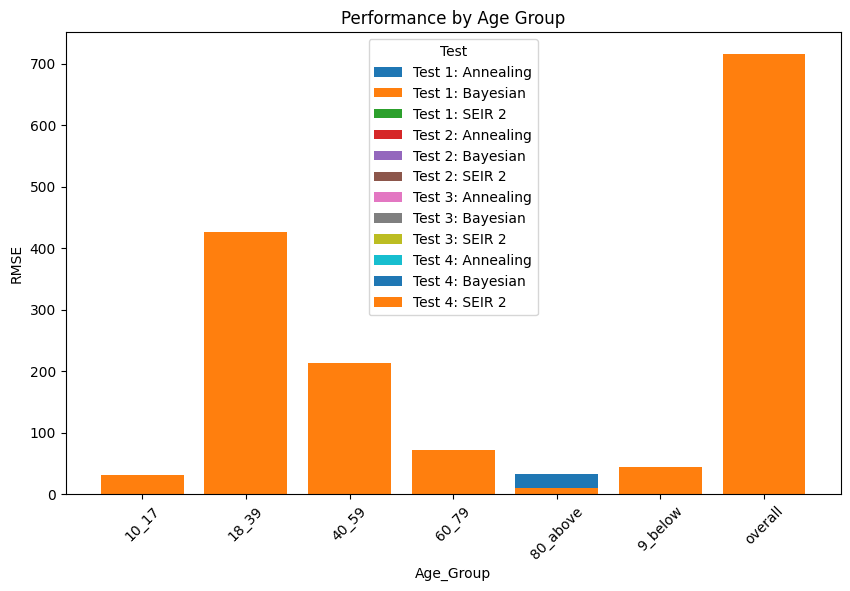

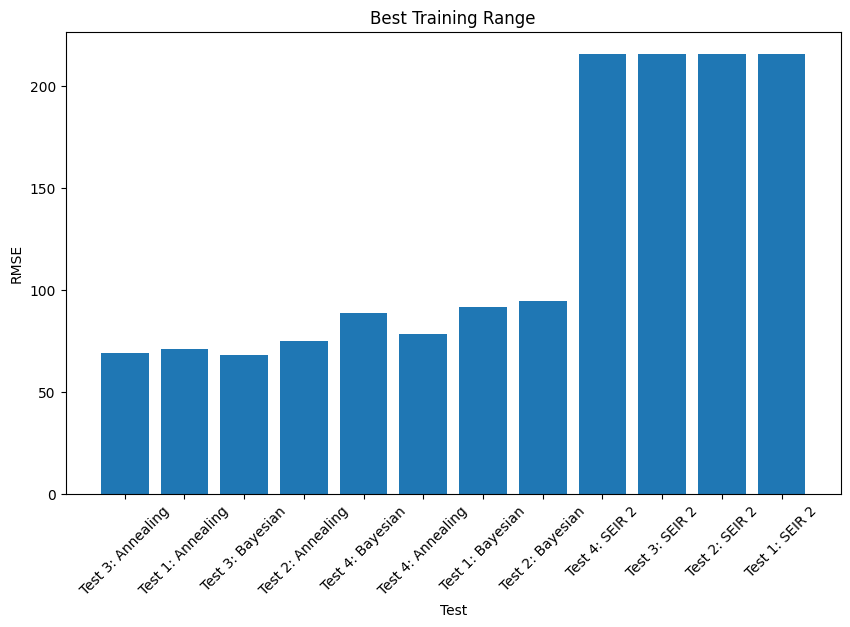

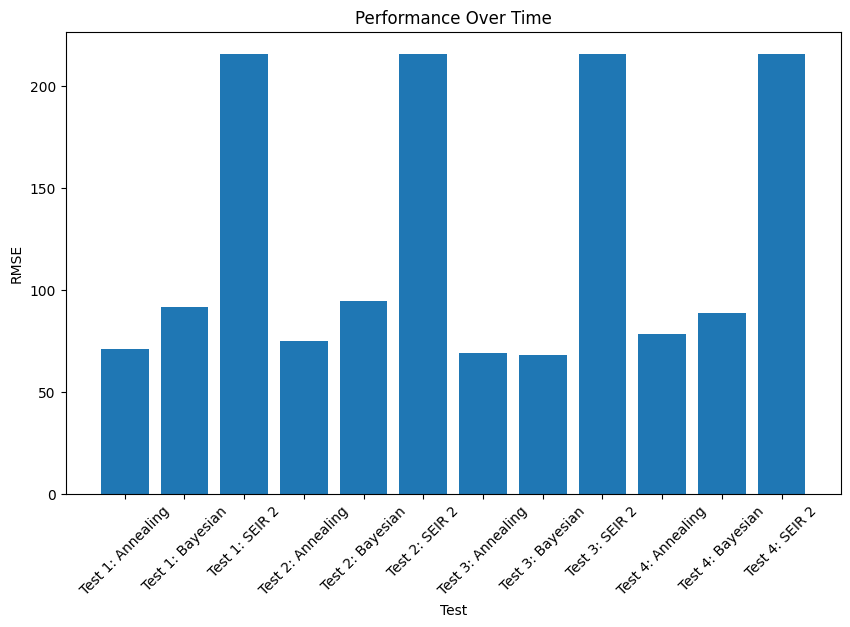

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define locations and age groups
locations = ["narra", "san_antonio", "san_lorenzo", "san_pedro"]
age_groups = ["9_below", "10_17", "18_39", "40_59", "60_79", "80_above", "overall"]

# Load datasets
def load_data():
    data = []
    for location in locations:
        for age_group in age_groups:
            file_path = f'model_selection_testing/Results/{location}_result_{age_group}.csv'
            df = pd.read_csv(file_path)
            df['Location'] = location
            df['Age_Group'] = age_group
            data.append(df)
    df = pd.concat(data, ignore_index=True)
    
    # Ensure 'Test' is treated as a string and filter out "SEIR-1"
    df['Test'] = df['Test'].astype(str)
    return df[~df['Test'].isin([ 'Test 1: SEIR 1', 'Test 2: SEIR 1', 'Test 3: SEIR 1', 'Test 4: SEIR 1'])]


# Preprocess data
def preprocess_data(df):
    df['Test'] = df['Test'].astype(str)
    numeric_columns = ['MSE', 'RMSE', 'MAE', 'NMAE', 'Beta', 'Sigma', 'Gamma']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN
    return df

# Compute summary statistics
def summarize_results(df):
    summary = df.groupby(['Location', 'Age_Group', 'Test']).agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean', 'NMAE': 'mean',
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return summary

# Determine best model per condition
def best_model(df):
    best_by_mse = df.loc[df.groupby(['Location', 'Age_Group', 'Test'])['MSE'].idxmin()]
    return best_by_mse

# Analyze training range effectiveness
def best_training_range(df):
    best_training = df.groupby('Test').agg({
        'MSE': 'mean', 'RMSE': 'mean', 'MAE': 'mean','NMAE':'mean'
    }).reset_index().sort_values(by='MSE')
    return best_training

# Average parameters per model
def average_parameters(df):
    avg_params = df.groupby('Test').agg({
        'Beta': 'mean', 'Sigma': 'mean', 'Gamma': 'mean'
    }).reset_index()
    return avg_params

# Model stability analysis
def model_stability(df):
    stability = df.groupby('Test').agg({
        'MSE': 'std', 'RMSE': 'std', 'MAE': 'std', 'NMAE':'std'
    }).reset_index()
    return stability

# Performance comparison by age group
def performance_by_age(df):
    return df.groupby(['Age_Group', 'Test']).agg({'RMSE': 'mean'}).reset_index()

# Hyperparameter effect on performance
def hyperparameter_effect(df):
    correlations = df[['Beta', 'Sigma', 'Gamma', 'RMSE']].corr()
    return correlations

# Model performance over time
def performance_over_time(df):
    return df.groupby(['Test']).agg({'RMSE': 'mean'}).reset_index()

# Plot results
def plot_results(df, title, x, y, hue=None):
    plt.figure(figsize=(10, 6))
    
    if hue:
        for label, group in df.groupby(hue):
            plt.bar(group[x], group[y], label=label)
        plt.legend(title=hue)
    else:
        plt.bar(df[x], df[y])
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.show()


# Main execution
if __name__ == "__main__":
    df = load_data()
    df = preprocess_data(df)
    
    summary_df = summarize_results(df)
    best_model_df = best_model(df)
    best_training_df = best_training_range(df)
    avg_params_df = average_parameters(df)
    stability_df = model_stability(df)
    performance_age_df = performance_by_age(df)
    hyperparameter_corr = hyperparameter_effect(df)
    performance_time_df = performance_over_time(df)
    
    # Print results
    print("Summary Statistics:")
    print(summary_df.head())
    print("Best Model per Condition:")
    print(best_model_df.head())
    print("Best Training Range:")
    print(best_training_df.head())
    print("Average Parameters per Model:")
    print(avg_params_df.head())
    print("Model Stability:")
    print(stability_df.head())
    print("Performance by Age Group:")
    print(performance_age_df.head())
    print("Hyperparameter Effect:")
    print(hyperparameter_corr)
    print("Performance Over Time:")
    print(performance_time_df.head())
    
    # Generate plots
    plot_results(performance_age_df, "Performance by Age Group", 'Age_Group', 'RMSE', 'Test')
    plot_results(best_training_df, "Best Training Range", 'Test', 'RMSE')
    plot_results(performance_time_df, "Performance Over Time", 'Test', 'RMSE')
